In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [579]:
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [580]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [581]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [582]:
data.shape

(2111, 17)

In [603]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [583]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [584]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

No null values are present in the dataset. 

Also, it has been made clear in the original dataset documentation that NObeyesdad column is generally the BMI which is calculated using Height and Weight of the people, the Height and Weight columns can also be removed from the dataset.

In [585]:
data.describe(include = 'object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [586]:
for col in data.describe(include = 'object').columns:
    print(f"{col}: {data[col].unique()}")
    print("-"*100)

Gender: ['Female' 'Male']
----------------------------------------------------------------------------------------------------
family_history_with_overweight: ['yes' 'no']
----------------------------------------------------------------------------------------------------
FAVC: ['no' 'yes']
----------------------------------------------------------------------------------------------------
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
----------------------------------------------------------------------------------------------------
SMOKE: ['no' 'yes']
----------------------------------------------------------------------------------------------------
SCC: ['no' 'yes']
----------------------------------------------------------------------------------------------------
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
----------------------------------------------------------------------------------------------------
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bi

# Data analysis and Visualization

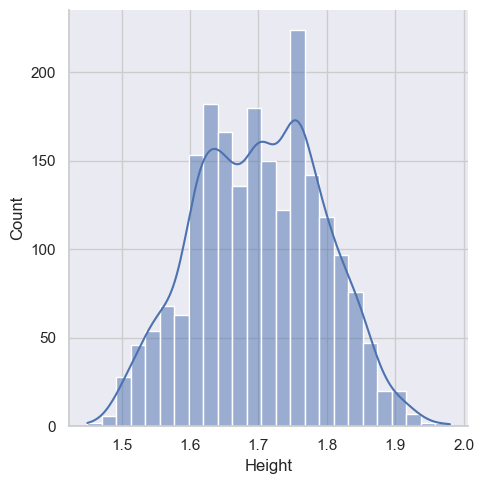

In [587]:
sns.displot(data['Height'], kde = True, bins = 25)
sns.set(style="whitegrid", rc={"axes.facecolor": "#eaeaf2"})

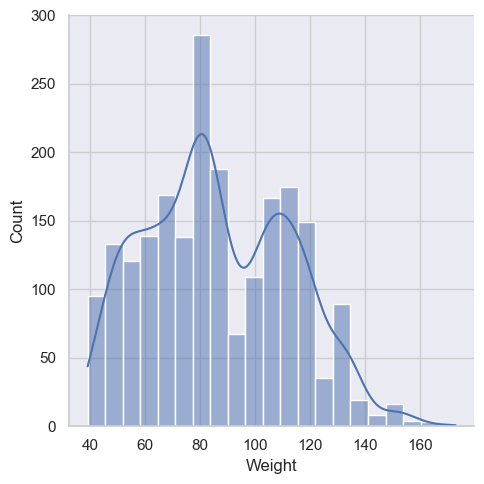

In [588]:
sns.displot(data["Weight"], kde = True)

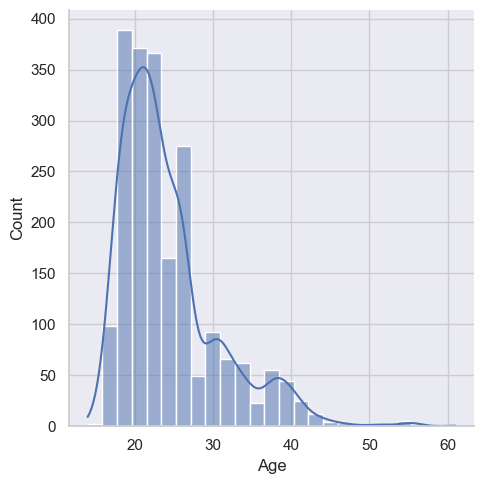

In [590]:
sns.displot(data['Age'], kde = True, bins = 25)

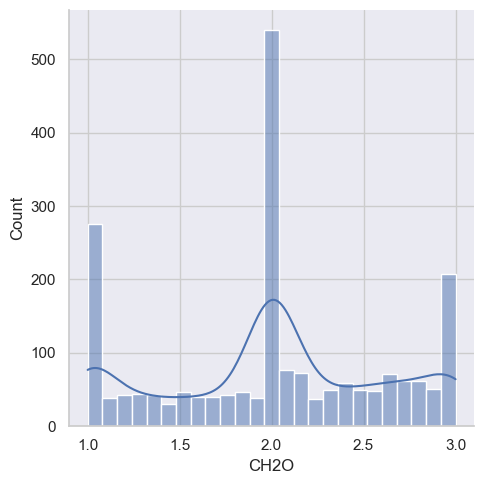

In [591]:
sns.displot(data.CH2O, kde= True, bins = 25)

In [592]:
data['NObeyesdad'].value_counts()    

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

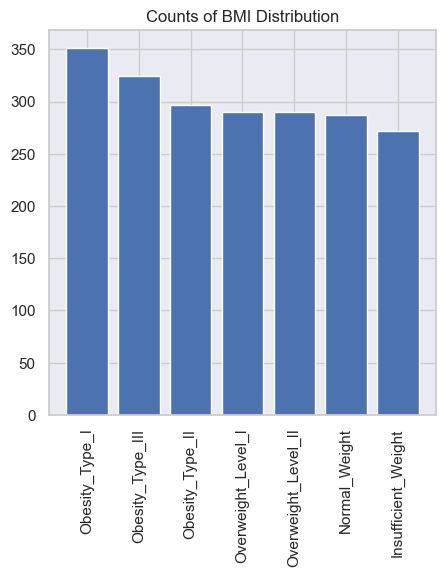

In [593]:
plt.figure(figsize = (5,5))
plt.title('Counts of BMI Distribution')
plt.bar(["Obesity_Type_I", "Obesity_Type_III", "Obesity_Type_II", "Overweight_Level_I", 
         "Overweight_Level_II", "Normal_Weight", "Insufficient_Weight"],
       data['NObeyesdad'].value_counts())
plt.xticks(rotation = 90)
plt.show()

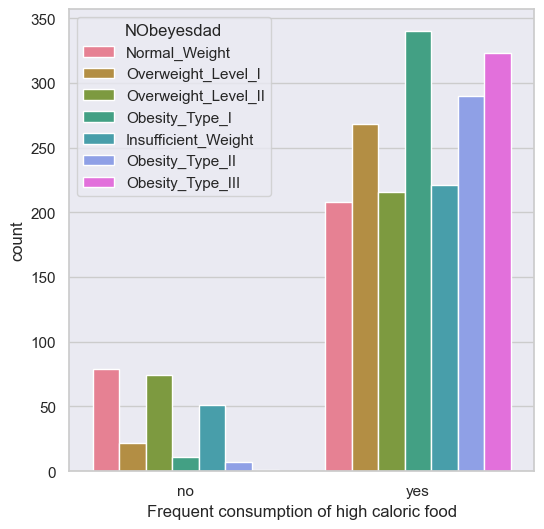

In [594]:
plt.figure(figsize = (6,6))
ax1 = sns.countplot(x = 'FAVC', hue = 'NObeyesdad', data = data, palette = "husl")
plt.xlabel("Frequent consumption of high caloric food")
plt.show()

The above barchart shows that FAVC (frequent consumption of high calorie food) has clearly high impact on obesity levels of people, with very high number of obese people.

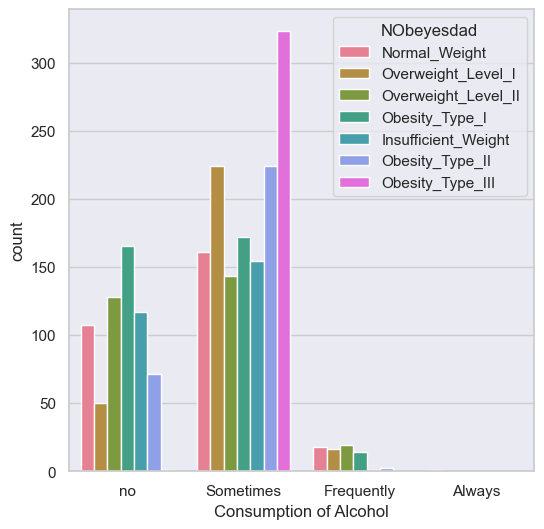

In [595]:
plt.figure(figsize = (6,6))
ax1 = sns.countplot(x = 'CALC', hue = 'NObeyesdad', data = data, palette = "husl")
plt.xlabel("Consumption of Alcohol")
plt.show()

Very few people consume alcohol always. Most people consume alcohol sometimes with most of them having Obesity Type III. 

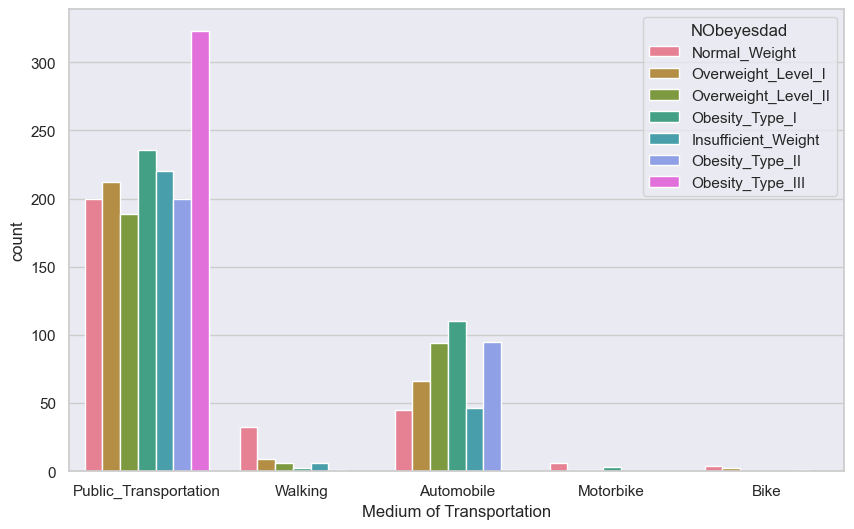

In [596]:
plt.figure(figsize = (10,6))
ax1 = sns.countplot(x = 'MTRANS', hue = 'NObeyesdad', data = data, palette = "husl")
plt.xlabel("Medium of Transportation")
plt.show()

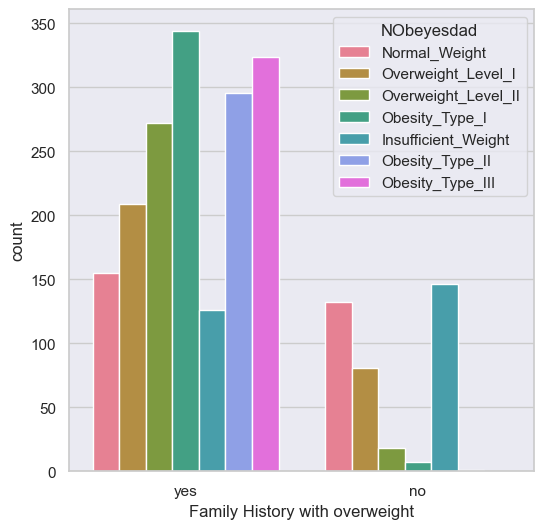

In [597]:
plt.figure(figsize = (6,6))
ax1 = sns.countplot(x = 'family_history_with_overweight', hue = 'NObeyesdad', data = data, palette = "husl")
plt.xlabel("Family History with overweight")
plt.show()

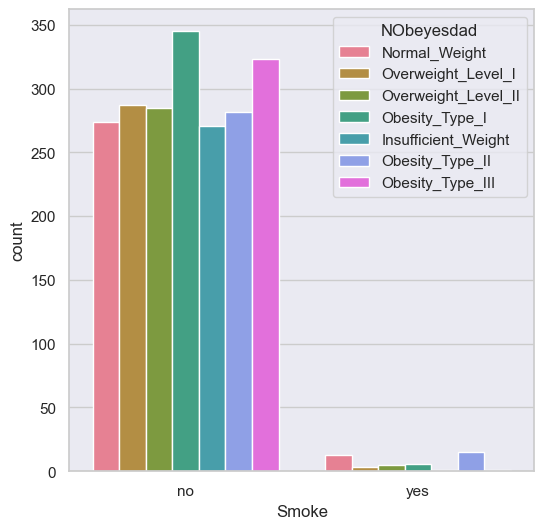

In [598]:
plt.figure(figsize = (6,6))
ax1 = sns.countplot(x = 'SMOKE', hue = 'NObeyesdad', data = data, palette = "husl")
plt.xlabel("Smoke")
plt.show()

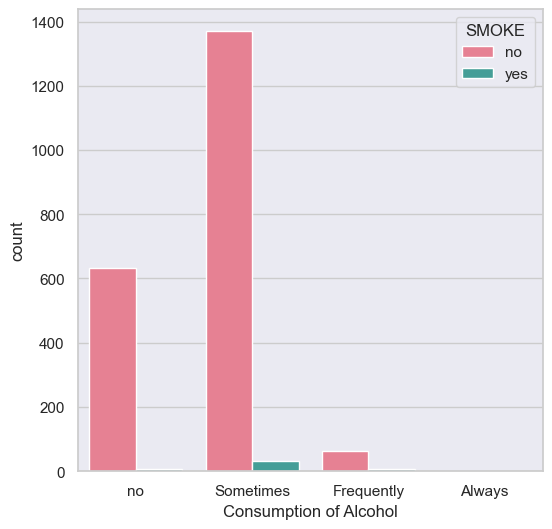

In [599]:
plt.figure(figsize = (6,6))
ax1 = sns.countplot(x = 'CALC', hue = 'SMOKE', data = data, palette = "husl")
plt.xlabel("Consumption of Alcohol")
plt.show()

In [487]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [488]:
numerical_columns = data.select_dtypes('float64')
numerical_columns

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [489]:
object_fcolumns = data.select_dtypes(object).columns.drop('NObeyesdad')
object_fcolumns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [490]:
object_dummies = pd.get_dummies(data[object_fcolumns])

In [491]:
object_dummies

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,True,False,False,True,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,True,False,False,True,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
2,False,True,False,True,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,False,True,True,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,False,True,True,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,True,False,False,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2107,True,False,False,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2108,True,False,False,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2109,True,False,False,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [492]:
data_d = pd.concat([numerical_columns, object_dummies, data['NObeyesdad']], axis = 1)

In [493]:
data_d.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,True,False,...,False,False,False,True,False,False,False,True,False,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,True,False,...,False,False,True,False,False,False,False,True,False,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,False,True,...,False,True,False,False,False,False,False,True,False,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,False,True,...,False,True,False,False,False,False,False,False,True,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,False,True,...,False,False,True,False,False,False,False,True,False,Overweight_Level_II


In [494]:
data_d.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                            bool
Gender_Male                              bool
family_history_with_overweight_no        bool
family_history_with_overweight_yes       bool
FAVC_no                                  bool
FAVC_yes                                 bool
CAEC_Always                              bool
CAEC_Frequently                          bool
CAEC_Sometimes                           bool
CAEC_no                                  bool
SMOKE_no                                 bool
SMOKE_yes                                bool
SCC_no                                   bool
SCC_yes                           

In [495]:
#Converting the values uint8 to float
data_dlabel = data_d['NObeyesdad']
data_dfeatures = data_d.drop(columns = 'NObeyesdad', axis = 1)

In [496]:
data_dfeatures.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                            bool
Gender_Male                              bool
family_history_with_overweight_no        bool
family_history_with_overweight_yes       bool
FAVC_no                                  bool
FAVC_yes                                 bool
CAEC_Always                              bool
CAEC_Frequently                          bool
CAEC_Sometimes                           bool
CAEC_no                                  bool
SMOKE_no                                 bool
SMOKE_yes                                bool
SCC_no                                   bool
SCC_yes                           

In [497]:
data_dfeatures = data_dfeatures.astype("float")

In [498]:
data_dfeatures.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

In [499]:
data_dfeatures.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: >

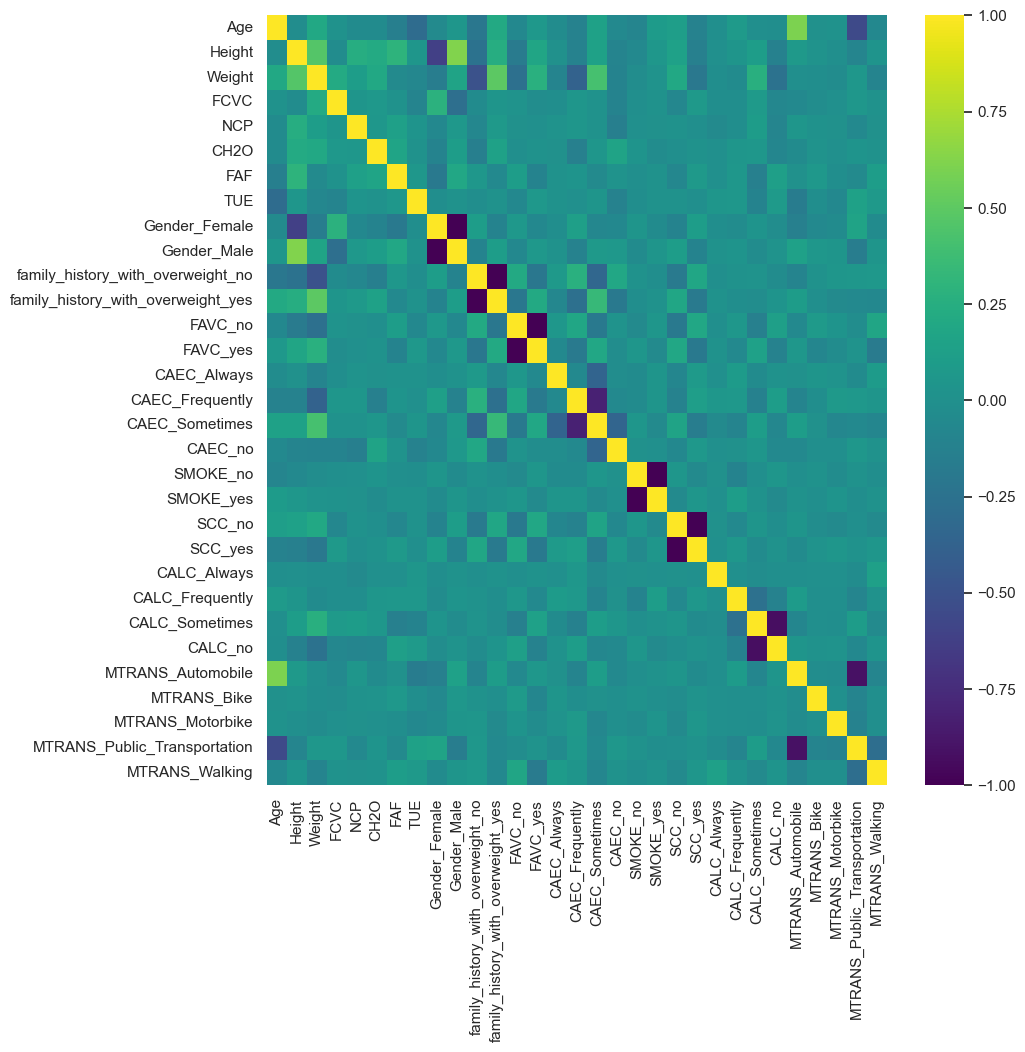

In [602]:
data_corr = data_dfeatures.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(data_corr, cmap="viridis")

## Scaling the Features

In [501]:
from sklearn.preprocessing import MinMaxScaler # 0 - 1

data_dfeatures_scaled = MinMaxScaler().fit_transform(data_dfeatures)

## Encdoing the Labels

In [502]:
data_dlabel

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

Reducing the classes to Binary (Obese and NotObese),

In [503]:
data_dlabel

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [504]:
data_dlabel.value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [505]:
from sklearn import preprocessing

data_dlabel_encoded = preprocessing.LabelEncoder().fit_transform(data_dlabel)

## Preparing the Data

In [506]:
X = data_dfeatures_scaled
y = data_dlabel_encoded

In [507]:
y

array([1, 1, 1, ..., 4, 4, 4])

In [508]:
# 70% train and 30% test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [509]:
# Define the Gaussian Process Regressor with an RBF kernel
# kernel = 1.0 * RBF(length_scale=1.0)
kernel = RBF()

# Gaussian Process Regression
gp_reg = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gp_reg.fit(X_train, y_train)

G:\AMLassignment\amlass\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=RBF(length_scale=1), n_restarts_optimizer=10,
                         random_state=42)

In [510]:
# Predict on the validation set
y_pred, sigma = gp_reg.predict(X_test, return_std = True)

In [511]:
from sklearn.metrics import mean_squared_error, r2_score

In [512]:
# Evaluate regression performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 3.01


In [513]:
r2 = r2_score(y_test, y_pred)
print(f'R2 Score : {r2:.2f}')

R2 Score : 0.23


In [514]:
not_similar = 0
similar = 0
for i in range(0, len(y_test)):
    # print(f'Real: {y_test[i]}, Predicted: {y_pred[i]:.2f}')
    if abs(y_test[i] - y_pred[i]) > 1:
        not_similar += 1
    else:
        similar += 1

print("Number of Predictions that are NOT close to Real Values:", not_similar)
print("Number of Predictions that are close to Real Values: ", similar)

Number of Predictions that are NOT close to Real Values: 159
Number of Predictions that are close to Real Values:  475


### GP classifier

In [440]:
# Define the Gaussian Process Classifier with an RBF kernel
# kernel = 1.0 * RBF(length_scale=1.0)
kernel = RBF()

In [441]:
classifier = GaussianProcessClassifier(kernel=kernel, random_state=42)

In [442]:
# Fit the classifier to the training data
classifier.fit(X_train, y_train)

GaussianProcessClassifier(kernel=RBF(length_scale=1), random_state=42)

In [443]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [444]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


In [445]:
from sklearn.metrics import classification_report

In [450]:
from sklearn.metrics import confusion_matrix

In [446]:
confusion = confusion_matrix(y_test, y_pred)

In [447]:
print(confusion)

[[74  7  3  0  0  7  1]
 [18 46  2  1  2  4  4]
 [ 2  7 66 20  7  0 12]
 [ 0  0  0 85  0  0  0]
 [ 0  0  0  0 91  0  1]
 [ 3 15  9  3  7 45  7]
 [ 0  9 14  9  1  5 47]]


Text(0.5, 1.0, 'Confusion Matrix Multiclass')

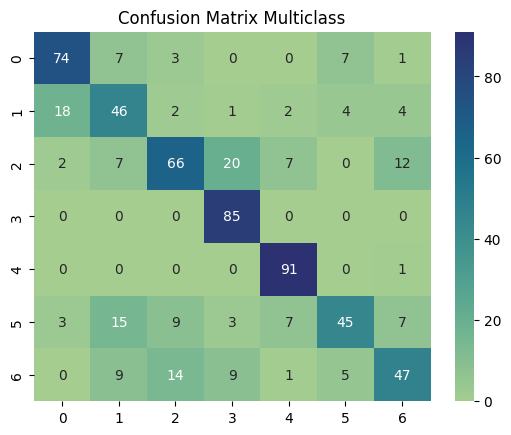

In [546]:
sns.heatmap(confusion, annot= True, fmt = 'g', cmap = 'crest')
plt.title("Confusion Matrix Multiclass")

In [448]:
clf_rep = classification_report(y_test, y_pred)

In [452]:
print(clf_rep)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        92
           1       0.55      0.60      0.57        77
           2       0.70      0.58      0.63       114
           3       0.72      1.00      0.84        85
           4       0.84      0.99      0.91        92
           5       0.74      0.51      0.60        89
           6       0.65      0.55      0.60        85

    accuracy                           0.72       634
   macro avg       0.71      0.72      0.71       634
weighted avg       0.71      0.72      0.71       634



## Classification by changing from multiclass to binary

In [453]:
conditions = data_dlabel.isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

In [454]:
data_dlabel = conditions.map({True: "Obese", False: "Not Obese"})

In [455]:
data_dlabel

0       Not Obese
1       Not Obese
2       Not Obese
3       Not Obese
4       Not Obese
          ...    
2106        Obese
2107        Obese
2108        Obese
2109        Obese
2110        Obese
Name: NObeyesdad, Length: 2111, dtype: object

In [456]:
data_dlabel_binary = preprocessing.LabelEncoder().fit_transform(data_dlabel)

In [457]:
data_dlabel_binary

array([0, 0, 0, ..., 1, 1, 1])

In [458]:
y_new = data_dlabel_binary

In [459]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y_new, test_size = 0.3, random_state = 1)

In [460]:
classifier_new = GaussianProcessClassifier(kernel=RBF(), random_state=42)

In [461]:
classifier_new.fit(X_train_new, y_train_new)

GaussianProcessClassifier(kernel=RBF(length_scale=1), random_state=42)

In [462]:
# Make predictions on the test set
y_pred_new = classifier_new.predict(X_test_new)

In [463]:
# Calculate accuracy
accuracy = accuracy_score(y_test_new, y_pred_new)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


In [464]:
confusion_new = confusion_matrix(y_test_new, y_pred_new)
print(confusion_new)

[[315  28]
 [ 24 267]]


Text(0.5, 1.0, 'Confusion Matrix Binary')

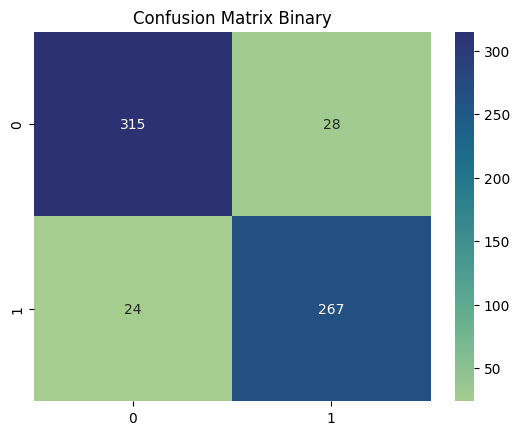

In [545]:
sns.heatmap(confusion_new, annot=True, cmap = "crest", fmt='g')
plt.title("Confusion Matrix Binary")

In [604]:
clf_rep_new = classification_report(y_test_new, y_pred_new)
print(clf_rep_new)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       343
           1       0.91      0.92      0.91       291

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634

